In [339]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [340]:
train=pd.read_csv("/Users/kai/Desktop/haitsclass/titanic/train.csv",engine='python').replace("male",0).replace("female",1).replace(['C', 'S', 'Q'], [0, 1, 2])

In [341]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [342]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [343]:
train.drop(["Name","Cabin","Ticket"], axis=1,inplace=True)

In [344]:
train.Age = train.Age.fillna(train.Age.mean())

([array([  75.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  427.,
            0.,    0.,    0.,    0.,    0.,    0.,   47.]),
  array([ 168.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  644.,
            0.,    0.,    0.,    0.,    0.,    0.,   77.])],
 array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
         1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,  2.   ]),
 <a list of 2 Lists of Patches objects>)

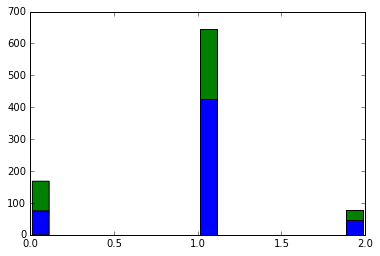

In [345]:
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])

temp = [i["Embarked"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [346]:
train.Embarked = train.Embarked.fillna("S")
train.Embarked = train.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])

In [347]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [348]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.017443
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.125953
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.305762
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.022521
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.031924
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.030874
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.035957
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.268865
Embarked,-0.017443,-0.125953,0.305762,-0.022521,-0.031924,0.030874,-0.035957,-0.268865,1.000000


In [349]:
train.drop(["Age","SibSp","Parch"], axis=1,inplace=True)

In [350]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Fare           float64
Embarked       float64
dtype: object

In [351]:
train_data = train.values
xs = train_data[:, 2:] 
y  = train_data[:, 1]

In [352]:
forest = RandomForestClassifier(n_estimators = 100)

forest = forest.fit(xs, y)

test=pd.read_csv("/Users/kai/Desktop/haitsclass/titanic/test.csv",engine='python').replace("male",0).replace("female",1)

test.Age = test.Age.fillna(test.Age.mean())
test.Embarked = test.Embarked.fillna("S")
test.Fare = test.Fare.fillna(test.Fare.mean())
test.Embarked = test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
test = test.drop(["Name","Cabin","Ticket","Age","SibSp","Parch"], axis=1)

In [353]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
Embarked       0
dtype: int64

In [354]:
test_data = test.values
xs_test = test_data[:, 1:]
output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

418 418


In [355]:
predict_data

[(892, 0),
 (893, 1),
 (894, 0),
 (895, 0),
 (896, 1),
 (897, 0),
 (898, 0),
 (899, 1),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 1),
 (911, 1),
 (912, 0),
 (913, 0),
 (914, 1),
 (915, 0),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 1),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 1),
 (925, 0),
 (926, 1),
 (927, 0),
 (928, 0),
 (929, 0),
 (930, 0),
 (931, 1),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 1),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 0),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 0),
 (961, 1),
 (962, 1),
 (963, 0),
 (964, 1),
 (965, 0),
 (966, 1),
 (967, 0),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 1),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 1),
 (979, 0),
 (980, 1),
 (981, 0),
 (982, 0),

In [356]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])